In [2]:
# !wget --output-file thinkdsp.py https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py

In [3]:
root_path = 'hw_2'

In [4]:
import thinkdsp as td
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
barbie_puppy_path = os.path.join(root_path, "barbie_vs_puppy")
barbie_path = os.path.join(barbie_puppy_path, "barbie")
puppy_path = os.path.join(barbie_puppy_path, "puppy")

In [6]:
bar01_wave = td.read_wave(os.path.join(barbie_path, "barbie_1.wav"))
bar01_wave.make_audio()

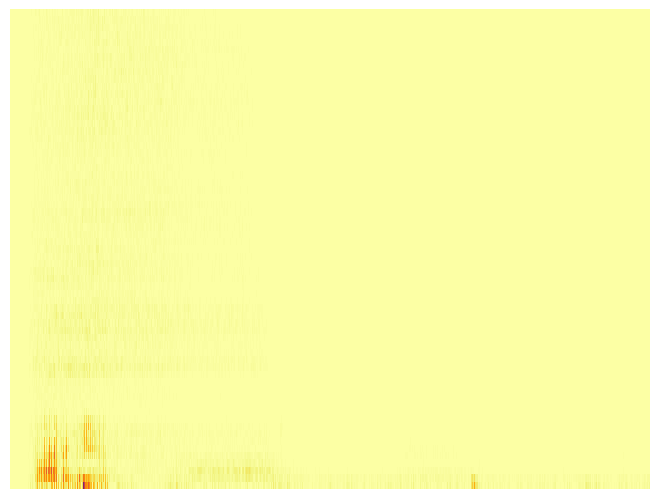

In [7]:
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
bar01_wave.make_spectrogram(128).plot()
plt.savefig("keks.jpg")

In [8]:
def save_spectrogram(wave, seg_length, file_path):
    plt.subplots(figsize=(4,3))
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.axis('off')
    wave_spec = wave.make_spectrogram(seg_length)
    wave_spec.plot()
    plt.savefig(f"{file_path}")
    plt.close()

In [9]:
def add_noise(wave, noise, beta=1, scale=1.0):
    """
    Add noise to wave.

    Returns augmented wave.
    """

    framerate = wave.framerate
    duration = wave.duration

    if noise is td.PinkNoise:
        noise_signal = noise(beta=beta)
    else:
        noise_signal = noise()
    
    noise_wave = noise_signal.make_wave(duration=duration, framerate=framerate)

    noise_wave.scale(scale)

    return wave + noise_wave

In [10]:
def augmented_wave(wave):
    """
    Apply every noise to wave.

    Returns list of noised wave. 
    """
    noise_types = [td.PinkNoise,
                  td.BrownianNoise,
                  td.UncorrelatedGaussianNoise,
                  td.UncorrelatedUniformNoise]
    noised_waves = []

    beta_max = 4
    for beta in range(beta_max):
        noised_waves.append(
            add_noise(wave, noise_types[0], beta)
        )

    for noise_type in noise_types[1:]:
        noised_waves.append(
            add_noise(wave, noise_type)
        )
    
    return noised_waves

In [11]:
import threading

def generate_dataset(origin_path, output_path):
    file_list = os.listdir(origin_path)
    seg_lengths = [10, 50, 128, 256, 512, 1024, 2048]

    for file_ in file_list:
        old_file_path = os.path.join(origin_path, file_)
        old_file_name = file_[:-4] # cut extension
        print(old_file_path)
        
        wave = td.read_wave(old_file_path)
        aug_waves = augmented_wave(wave)
        for idx, aug_wave in enumerate(aug_waves):
            for seg in seg_lengths:
                new_file_path = os.path.join(
                    output_path,
                    f"{old_file_name}_{idx:02d}_{seg:04d}.jpg"
                )
                if os.path.exists(new_file_path):
                    continue
                save_spectrogram(aug_wave, seg, new_file_path)
                print(new_file_path)
        print()


In [12]:
# t1 = threading.Thread(target=generate_dataset, args=[puppy_path,"puppy_new"])
# t1.start()
# t2 = threading.Thread(target=generate_dataset, args=[barbie_path,"barbie_new"])
# t2.start()

# t1.join()
# t2.join()

generate_dataset(puppy_path, "puppy_new")

hw_2/barbie_vs_puppy/puppy/puppy_21.wav

hw_2/barbie_vs_puppy/puppy/puppy_35.wav

hw_2/barbie_vs_puppy/puppy/puppy_34.wav

hw_2/barbie_vs_puppy/puppy/puppy_20.wav

hw_2/barbie_vs_puppy/puppy/puppy_36.wav

hw_2/barbie_vs_puppy/puppy/puppy_22.wav
puppy_new/puppy_22_00_0050.jpg
puppy_new/puppy_22_00_0256.jpg
puppy_new/puppy_22_00_0512.jpg
puppy_new/puppy_22_00_1024.jpg
puppy_new/puppy_22_00_2048.jpg
puppy_new/puppy_22_01_0010.jpg
puppy_new/puppy_22_01_0050.jpg
puppy_new/puppy_22_01_0256.jpg
puppy_new/puppy_22_01_0512.jpg
puppy_new/puppy_22_01_1024.jpg
puppy_new/puppy_22_01_2048.jpg
puppy_new/puppy_22_02_0010.jpg
puppy_new/puppy_22_02_0050.jpg
puppy_new/puppy_22_02_0256.jpg
puppy_new/puppy_22_02_0512.jpg
puppy_new/puppy_22_02_1024.jpg
puppy_new/puppy_22_02_2048.jpg
puppy_new/puppy_22_03_0010.jpg
puppy_new/puppy_22_03_0050.jpg
puppy_new/puppy_22_03_0256.jpg
puppy_new/puppy_22_03_0512.jpg
puppy_new/puppy_22_03_1024.jpg
puppy_new/puppy_22_03_2048.jpg
puppy_new/puppy_22_04_0010.jpg
puppy_new/p

In [13]:
generate_dataset(barbie_path, "barbie_new")

hw_2/barbie_vs_puppy/barbie/barbie_28.wav

hw_2/barbie_vs_puppy/barbie/barbie_14.wav

hw_2/barbie_vs_puppy/barbie/barbie_15.wav

hw_2/barbie_vs_puppy/barbie/barbie_29.wav

hw_2/barbie_vs_puppy/barbie/barbie_17.wav

hw_2/barbie_vs_puppy/barbie/barbie_16.wav

hw_2/barbie_vs_puppy/barbie/barbie_8.wav
barbie_new/barbie_8_02_2048.jpg
barbie_new/barbie_8_03_0010.jpg
barbie_new/barbie_8_03_0050.jpg
barbie_new/barbie_8_03_0256.jpg
barbie_new/barbie_8_03_0512.jpg
barbie_new/barbie_8_03_1024.jpg
barbie_new/barbie_8_03_2048.jpg
barbie_new/barbie_8_04_0010.jpg
barbie_new/barbie_8_04_0050.jpg
barbie_new/barbie_8_04_0256.jpg
barbie_new/barbie_8_04_0512.jpg
barbie_new/barbie_8_04_1024.jpg
barbie_new/barbie_8_04_2048.jpg
barbie_new/barbie_8_05_0010.jpg
barbie_new/barbie_8_05_0050.jpg
barbie_new/barbie_8_05_0256.jpg
barbie_new/barbie_8_05_0512.jpg
barbie_new/barbie_8_05_1024.jpg
barbie_new/barbie_8_05_2048.jpg
barbie_new/barbie_8_06_0010.jpg
barbie_new/barbie_8_06_0050.jpg
barbie_new/barbie_8_06_0256.j

In [16]:
augmented_root_dir = 'aug'
augmented_training_dir = os.path.join(augmented_root_dir, 'training')
augmented_validation_dir = os.path.join(augmented_root_dir, 'validation')

puppy_dir = 'puppy'
barbie_dir = 'barbie'

# Create root dir
if augmented_root_dir not in os.listdir(os.path.curdir):
    os.mkdir(os.path.join(os.path.curdir, augmented_root_dir))

# Create training and validation dirs
if not os.path.isdir(augmented_training_dir):
    os.mkdir(augmented_training_dir)

if not os.path.isdir(augmented_validation_dir):
    os.mkdir(augmented_validation_dir)

# Create subdirs for puppy and barbie
if not os.path.isdir(os.path.join(augmented_training_dir, puppy_dir)):
    os.mkdir(os.path.join(augmented_training_dir, puppy_dir))

if not os.path.isdir(os.path.join(augmented_training_dir, barbie_dir)):
    os.mkdir(os.path.join(augmented_training_dir, barbie_dir))

if not os.path.isdir(os.path.join(augmented_validation_dir, puppy_dir)):
    os.mkdir(os.path.join(augmented_validation_dir, puppy_dir))

if not os.path.isdir(os.path.join(augmented_validation_dir, barbie_dir)):
    os.mkdir(os.path.join(augmented_validation_dir, barbie_dir))


In [14]:
import shutil

def copy_dataset(type_):
    origin_aug_path = os.path.join(os.path.curdir, f"{type_}_new")
    train_path = os.path.join(augmented_root_dir, 'training')
    train_path = os.path.join(train_path, type_) # puppy or barbie dir
    valid_path = os.path.join(augmented_root_dir, 'validation')
    valid_path = os.path.join(valid_path, type_) # puppy or barbie dir
    
    for file_ in os.listdir(origin_aug_path):
        # files with 03 in filename closest to original waves
        if '_03_' in file_:
            shutil.copy(
                os.path.join(origin_aug_path, file_), 
                os.path.join(valid_path, file_)
            )
        else:
            shutil.copy(
                os.path.join(origin_aug_path, file_), 
                os.path.join(train_path, file_)
            )

In [17]:
copy_dataset('barbie')

In [58]:
copy_dataset('puppy')

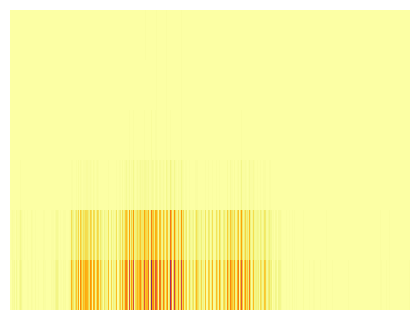

In [74]:
test = td.read_wave(r"/Users/kot_mapku3/Developer/s23/dsp/barbie.wav")
save_spectrogram(test, 10, "test_barbie.jpg")